## Introduction

 In recent years, the increasing availability of data in healthcare has become an invaluable source of information. However, the complexity of these datasets requires a meticulous analytical approach to extract valuable insights. In this context, the proposed project stands out as a unique opportunity to explore the NHANES (National Health and Nutrition Examination Survey) dataset, a key initiative funded by the U.S. Centers for Disease Control and Prevention (CDC) through the National Center for Health Statistics (NCHS).

 NHANES is a veritable treasure trove of information on the health and nutritional status of adults and children on U.S. soil. Collected through interviews, physical examinations, and laboratory tests, this dataset not only reflects the diversity of the population but also offers a comprehensive view of the health conditions prevalent in the country. With its extensive coverage and richness of variables, NHANES presents itself as a fertile ground for the exploration and application of advanced data analysis techniques.

## Project Objective

The fundamental purpose of this project is to conduct a robust and comprehensive analysis of the NHANES dataset, aiming to identify patterns, trends, and relationships that can inform and enrich our understanding of health and nutrition in the United States. As a data analyst, my task is to employ advanced preparation, modeling, and visualization methods in order to extract deep and relevant insights from this complex data.

### Expected

Throughout this project, I hope to contribute to a deeper understanding of the factors that impact the health of the people. Identifying relationships between key variables, applying advanced machine learning techniques, and exploring potential clusters will open doors to more effective disease intervention and prevention strategies. In addition, comparative analysis between different demographic groups, notably between the "elderly" and the "non-elderly," will provide valuable insight into the specific needs of these distinct populations.

#### Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
# reading the csv file
df = pd.read_csv('NHANES_age_prediction.csv')

## Data Understanding

In this phase we will Gather the data required for the project.
Performing an initial exploration of the data to gain an understanding of its contents.

To achieve this we will:
- Evaluating the quality of the data and pinpoint any possible problems.
- Understand the file size (Number of rows and columns)
- Map the type of data in the dataset.
- Identify missing values and duplicate information
- Statistical analysis of the database: This step is necessary to prepare the basis for the following processes of statistical analysis.
- Obtain the statistical summary of the database.
- Display graphically.


#### Description of Variables:

 - SEQN (Respondent Sequence Number): Continuous variable that represents the sequence number assigned to each respondent in the study, providing a unique identification.

* age_group (Age Group): Categorical variable, the target variable of our study, defines the age range of the respondent, distinguishing between "senior" and "non-elderly".

* RIDAGEYR (Respondent's Age): Continuous variable that expresses the exact age of the respondent.

* RIAGENDR (Gender): Continuous variable representing the respondent's gender, where specific values denote male or female gender.

* PAQ605 (Physical Activity): Continuous variable that assesses whether the respondent engages in moderate- or vigorous-intensity sports, fitness, or recreational activities during a typical week.

* BMXBMI (Body Mass Index): Continuous variable indicating the respondent's Body Mass Index, providing a measure of body composition.

* LBXGLU (Post-Fasting Blood Glucose): A continuous variable representing the respondent's blood glucose levels after a period of fasting.

* DIQ010 (Diabetes): Continuous variable indicating whether the respondent is diabetic.

* LBXGLT (Respondent's Oral): A continuous variable that reflects the respondent's oral characteristics.

* LBXIN (Insulin Levels): Continuous variable that provides information about the respondent's blood insulin levels.

These variables represent crucial facets of participants' health and lifestyle, paving the way for in-depth analysis and identification of meaningful patterns. The next step will be the application of data preparation techniques to ensure that they are ready for subsequent modeling and analysis.


In [4]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [6]:
# checking the size of the dataset
df.shape

(2278, 10)

In [7]:
# cheching the number of atributes
num_atributes = len(df.columns)

In [8]:
display(num_atributes)

10

In [9]:
# checking the number of observations
num_observations = len(df)

In [10]:
display(num_observations)

2278

In [11]:
# statistical analysis
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


### Exploring the Distribution of Classes in the Dataset

> This code uses the matplotlib and seaborn libraries to create a bar chart that visualizes the distribution of classes in the dataset. The variable age_group is represented on the x-axis, while the height of the bars indicates the count of each class. This type of visualization is useful for understanding the proportion of observations in each class and identifying imbalances, if any, in the dataset.

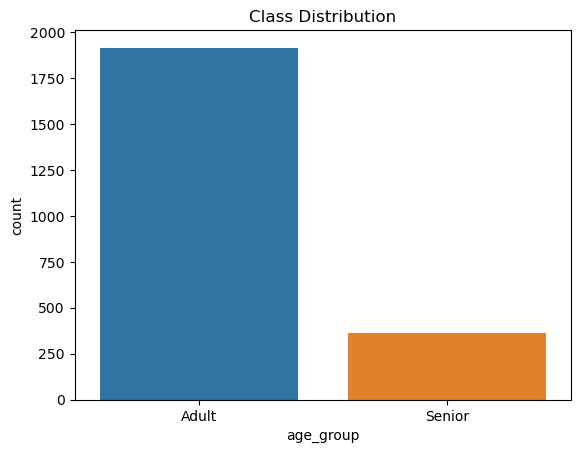

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


# Class distribution visualization
sns.countplot(x='age_group', data=df)
plt.title('Class Distribution')
plt.show()






## Data Preparation:

In the Data Preparation Phase, the emphasis is on refining the collected data to ensure its quality, consistency, and compatibility for subsequent analysis and model training. This phase involves a series of steps aimed at cleaning, transforming and structuring the data.


In [13]:
# Checking the missing values
df.isnull().sum()

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64



# Encoding



### Preparation for Modeling:

 Many machine learning algorithms require the input variables to be numeric. By converting categorical variables into numerical values, we make the data compatible with these algorithms.

* Data Consistency:

 Encoding ensures consistency in data types. By representing categories by numbers, we avoid ambiguity and make it easier for the machine to interpret the data.

* Standardization of Input:

 In some cases, standardizing variables can improve the performance of models. Coding is often accompanied by additional steps, such as standardization using StandardScaler, which normalizes numerical variables.

* Facilitates Analysis and Visualizations:

o Numerically encoded data is more easily manipulated in statistical analysis and visualizations. In addition, many algorithms and data analysis techniques are designed to handle numerical inputs.

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Categorical variables encoding
le = LabelEncoder()
df['age_group'] = le.fit_transform(df['age_group'])


In [15]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


### The correlation matrix



* The correlation matrix helps identify patterns of behavior between different traits, making it a valuable measure for understanding how specific variables are related to each other. This analysis is critical in research, allowing insights into dependencies and mutual influences between the different elements of a dataset.

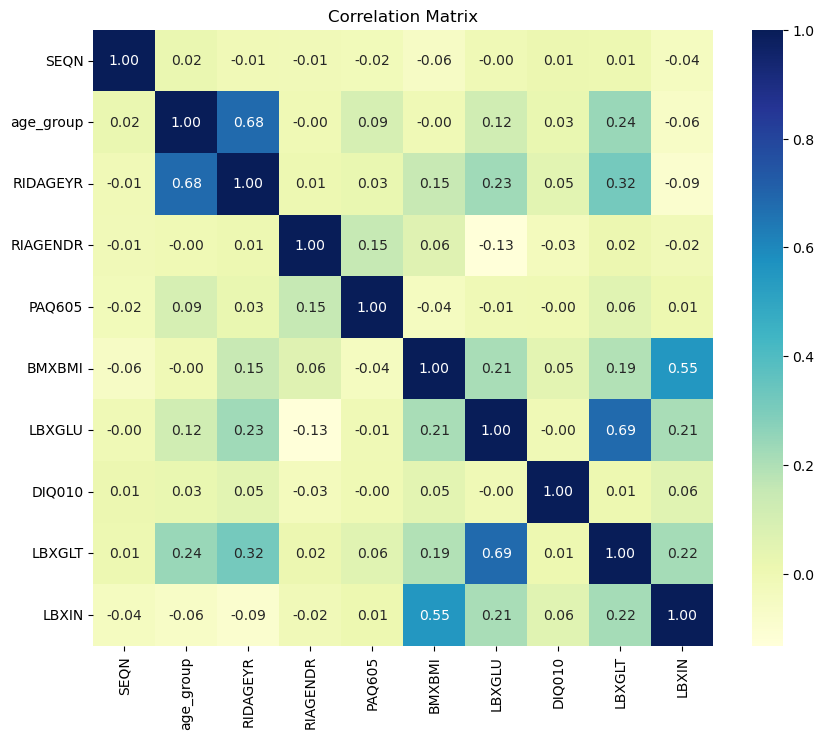

In [16]:
# Correlation matrix 
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")  
plt.title('Correlation Matrix')
plt.show()

#### Age_group - RIDAGEYR (0.68):

* This moderate positive correlation (0.68) suggests that there is an association between the variable representing age groups (age_group) and age in years (RIDAGEYR). This indicates that, in general, as age groups increase, the average age also tends to increase.

* This correlation is expected, as age groups are usually defined based on age, so it is natural to observe a positive relationship.

#### BMXBMI - LBXIN (0.55):

* This moderate positive correlation (0.55) indicates an association between body mass index (BMI - BMXBMI) and insulin (LBXIN). This suggests that, in general, as body mass index increases, insulin levels also tend to increase.

* This correlation is consistent with medical knowledge, as body mass index and insulin levels are related to metabolic health and body composition.

#### LBXGLT - LBXGLU (0.69):

* This strong positive correlation (0.69) suggests an association between triglyceride (LBXGLT) and glucose (LBXGLU) levels. This indicates that, in general, as triglyceride levels increase, glucose levels also tend to increase.

* This correlation is relevant to understanding metabolic health, as triglycerides and glucose are related to common metabolic processes, such as blood glucose regulation.

#### [The correlations identified offer insights into the relationships in the dataset. The interpretation of these results requires consideration of the context of the study, characteristics of the population, and consultation of the medical literature to validate the observed associations.]


# Dimensionality reduction

## PCA & LDA

* PCA and LDA are both powerful techniques for dimensionality reduction, but they have different objectives and assumptions.

>One of the main ences is in their objectives. PCA aims to find the directions of maximum variance in the data, while LDA aims to find the projection that best separates the classes in the data.

>Another difference is in their assumptions. PCA is an unsupervised method that does not take into account the class labels in the data. LDA, on the other hand, is a supervised method that assumes that the data is normally distributed and that the covariance matrices for each class are equal.

>Finally, PCA is often used for exploratory data analysis and preprocessing of data for machine learning algorithms, while LDA is often used for classification and feature selection.

* Summary
In conclusion, PCA and LDA are both powerful techniques for dimensionality reduction that can be used in a variety of applications. PCA is an unsupervised method that aims to find the directions of maximum variance in the data, while LDA is a supervised method that aims to find the projection that best separates the classes in the data. The choice of method depends on the specific problem and the characteristics of the dataset.

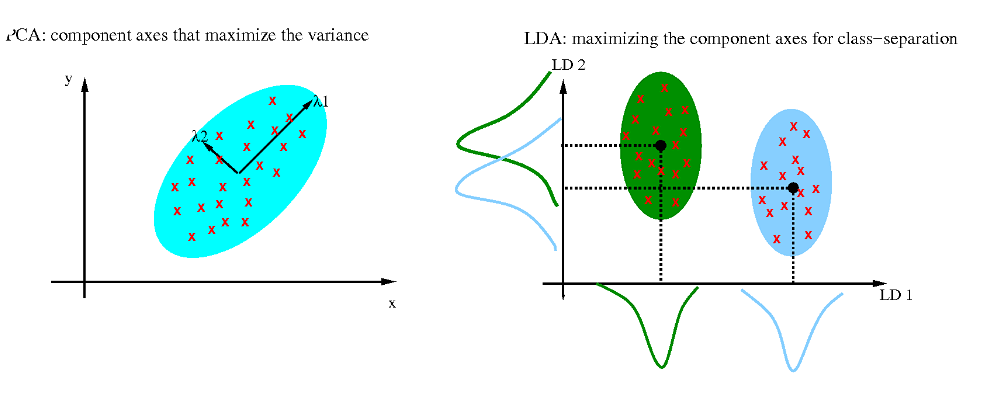



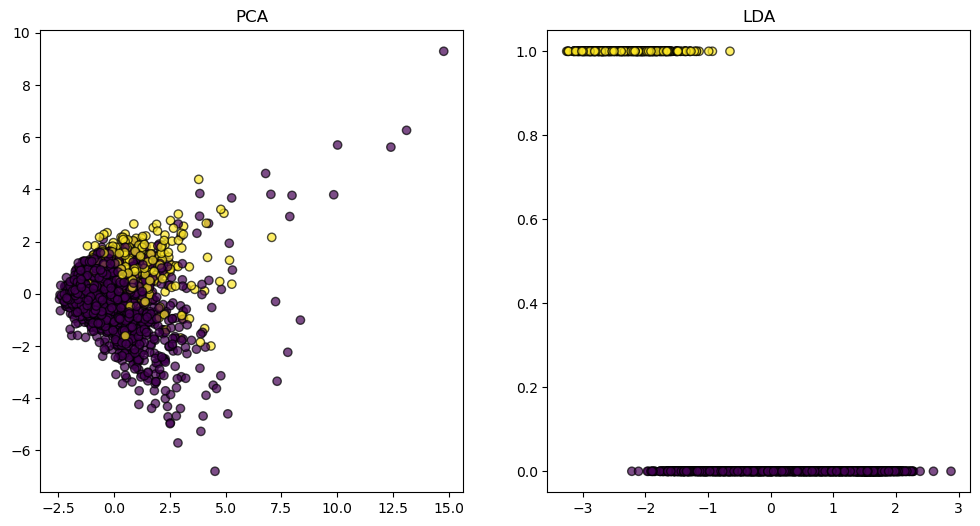

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

# Separating the target variable 'age_group'
X = df.drop('age_group', axis=1)
y = df['age_group']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Checking the number of unique classes to adjust n_components for LDA
num_classes = len(df['age_group'].unique())
n_components_lda = min(X.shape[1], num_classes - 1)

# Applying PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Applying LDA
lda = LDA(n_components=n_components_lda)
lda_result = lda.fit_transform(X_scaled, y_encoded)

# Visualizing PCA and LDA 
plt.figure(figsize=(12, 6))

# Visualizing PCA
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_encoded, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('PCA')

# Visualizing LDA
plt.subplot(1, 2, 2)
plt.scatter(lda_result, y_encoded, c=y_encoded, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('LDA')

plt.show()


### Explanation of PCA and LDA Charts:

#####  PCA (Principal Component Analysis):

* The PCA chart shows a distribution of the data across two dimensions that capture most of the variability in the dataset.

* Most of the points are concentrated between 2 on the x-axis and 2.5 on the y-axis, indicating that most of the variance in the data is in this region.
However, it is noticeable that the data is mixed, suggesting that there is no clear separation between the classes.

##### LDA (Linear Discriminant Analysis):

* In the LDA chart, we notice a more structured arrangement of the data in relation to classes.

* The yellow dots extend horizontally between approximately 1 and -1 on the x-axis, indicating a clear separation from the discriminant axis found by the LDA.

* The purple dots are most concentrated around 0 on the x-axis and extend horizontally between -2 and 2 on the y-axis.

General Interpretation:

* The PCA reveals the overall structure of the data, highlighting areas of high variability, but not necessarily indicating the separation between classes.

* LDA, on the other hand, is designed to find the direction that best separates the classes, resulting in a more discriminant arrangement of the data.

* The joint analysis of PCA and LDA provides valuable insights into the structure of the data. While the PCA highlights the overall variability, the LDA focuses on the separation of classes.

* Observation of mixed data in the PCA suggests that classes may overlap, while the clearer structure in LDA indicates an ability to discriminate between classes.

In summary, the combination of PCA and LDA allows for a comprehensive view of the distribution and separation of data, providing valuable information for analysis and modeling tasks.

#### Comparison between LDA (Linear Discriminant Analysis) and PCA (Principal Component Analysis):

##### Main Objectives:

>PCA: Maximizes the total variance of the data, regardless of classes.

>LDA: Maximizes separation between classes, aiming to reduce intraclass variability and increase variability between classes.

· Nature of Transformations:

>PCA: It is based on the decomposition of the eigenvectors of the covariance matrix of the data.

>LDA: Takes class information into account when calculating the dispersion matrix between classes and within classes.

##### Dimensionality:

>PCA: Reduces dimensionality by considering all information, not taking into account classes.

>LDA: Reduces dimensionality in order to optimize the separation between specific classes.

Application in Classification:

>PCA: It is often used for pre-processing prior to sorting techniques.

>LDA: It's specific to classification problems and is effective when there are well-defined classes.

##### Results in the Charts:

>PCA: The results show the global distribution of the data, without distinguishing between classes.

>LDA: The results highlight the separation between classes, prioritizing discrimination.



#####  Impact on Classification Analysis Results:

>PCA: It can help in identifying general patterns in the data, but it does not guarantee that those patterns align with the classes.

>LDA: Aimed at maximizing class separation, it is more likely to improve the performance of classification models.

##### In the Anomalous Grouping:

>PCA: May not effectively highlight data regions that are anomalous with respect to specific classes.

>LDA: By focusing on the separation between classes, you can highlight anomalies more clearly, especially if they are associated with specific characteristics of the classes.

##### Anomaly Interpretation:

>PCA: Anomalies may not be so evident, as the technique does not prioritize the separation between classes.

>LDA: Tends to highlight anomalies that deviate from the patterns learned in the classes.

##### Selection of Dimensional Reduction Technique:

The choice between PCA and LDA depends on the specific purpose of the analysis.

For classification tasks, where separation between classes is crucial, LDA may be preferable.

For general visualization and dimensionality reduction without considering classes, PCA is more appropriate.

* Conclusion: The choice between PCA and LDA should be based on the specific characteristics of the dataset and the objectives of the analysis, considering whether the emphasis is on class separation or on a general understanding of data variability. Both techniques have valuable applications, depending on the context of the analysis.

# Modeling
What is widely regarded as data science’s most exciting work is also often the shortest phase of the project.
Here We’ll likely build and assess various models based on several different modeling techniques. This phase has four tasks:
* Select modeling techniques: Determine which algorithms to try.
* Generate test design: Pending your modeling approach, we need to split the data into training, test, and validation sets.
* Build model: As glamorous as this might sound, this might just be executing a few lines of code.
* Assess model: Generally, multiple models are competing against each other, and the data scientist needs to interpret the model results based on domain knowledge, the pre-defined success criteria, and the test design.



In [31]:
from sklearn.model_selection import train_test_split

# Separating features (X) and target (y)
X = df.drop('age_group', axis=1)
y = df['age_group']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Displaying the features
display(X,y)

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...
2273,83711.0,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


0       0
1       0
2       0
3       0
4       0
       ..
2273    0
2274    0
2275    0
2276    0
2277    0
Name: age_group, Length: 2278, dtype: int32

## Random Forest





I select a machine learning model for my project, I opted for Random Forest due to several fundamental reasons. Random Forest is a versatile and powerful technique that offers many benefits in different scenarios:

* Versatility and Performance: Random Forest is capable of handling forecasting and classification tasks, while being effective on a variety of data sets. Its flexibility makes it a solid choice for addressing different types of problems.

* Handling Important Traits: With the ability to calculate the importance of traits, Random Forest provides valuable insights into which variables have the greatest influence on the model. This is crucial for interpreting the impact of variables on the final result.

* Resistance to Overfitting: The technique of building parallel trees and randomness in the choice of traits make Random Forest less susceptible to overfitting compared to a single decision tree.

* Performance with Unbalanced Data: In datasets with unbalanced classes, Random Forest demonstrates good performance because averaging the predictions from multiple trees compensates for imbalances.

* Efficient Hyperparameter Tuning: Adjusting Random Forest's hyperparameters, such as the number of trees, maximum depth, and split criteria, can be done efficiently with techniques such as GridSearchCV, allowing you to optimize model performance.

The choice of Random Forest reflects the search for a robust, interpretable, and effective model for my dataset, considering its specific characteristics and objectives.

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Training the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:\n', classification_report_result)
print('\nConfusion Matrix:\n', confusion_matrix_result)


Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
           1       1.00      1.00      1.00        74

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456


Confusion Matrix:
 [[382   0]
 [  0  74]]


## >Grid Search

>Grid Search is a technique used to find the best hyperparameters for a machine learning model. In the context of the RandomForestClassifier, these hyperparameters affect the structure and behavior of trees in the forest. This is the explanation for each parameter and the values chosen:

· 'n_estimators': Represents the number of trees in the forest. Grid Search tests three options: 50, 100, and 200. Higher values can increase performance, but they also increase computational cost.

· 'max_depth': Indicates the maximum depth of each tree in the forest. Grid Search considers trees with no depth limit (None) as well as maximum depths of 10 and 20. Limiting the depth can prevent overfitting, ensuring that the trees don't become too specific to the training set.

· 'min_samples_split': Sets the minimum number of samples required to split an inner node. Grid Search tests 2, 5, and 10 samples. This influences the granularity of the divisions in the tree.

· 'min_samples_leaf': Represents the minimum number of samples required to form a sheet. Grid Search considers 1, 2, and 4 samples. This parameter controls the complexity of the tree, avoiding leaves that are too small.

In [35]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters to be tuned
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Configuring the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Performing the grid search
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_

print('Best Hyperparameters:', best_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


## Feature Importance

In [39]:

# Fitting the model to the training data
rf_model.fit(X_train, y_train)
# Feature Importance for Random Forest
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Feature Importance:\n', feature_importance)


Feature Importance:
 RIDAGEYR    0.919214
LBXGLT      0.034751
LBXGLU      0.014750
BMXBMI      0.010478
LBXIN       0.009258
SEQN        0.006744
PAQ605      0.002117
DIQ010      0.001908
RIAGENDR    0.000780
dtype: float64


The importance scores of the variables were generated by the Random Forest classifier machine learning model. These scores represent the contribution of each variable to the predictive performance of the model. The higher the score, the more important the variable is for making predictions.

Here is an interpretation of the importance scores of the variables:

>· RIDAGEYR (Respondent's age): This variable has the highest importance score (0.919). This suggests that age is the most crucial factor in predicting the target variable.

>· LBXGLT (Oral Glucose Tolerance Test Result): The second most important variable, with a score of 0.035. This indicates that the result of the oral glucose tolerance test is a significant contributor to the model's predictions.

>· LBXGLU (Post-fasting blood glucose level): This variable has a lower importance compared to LBXGLT, but is still relatively important (0.015).

>· BMXBMI (Body Mass Index): BMI has a lower importance score (0.010), suggesting that it contributes less to the model compared to age and glucose-related variables.

>· LBXIN (Blood insulin levels): This variable has a score of 0.009, indicating its contribution to the model's predictions.

>· SEQN (Respondent Sequence Number): The sequence number has a lower importance (0.007), suggesting that it does not significantly impact predictions compared to other variables.

>· PAQ605 (Participation in sports or recreational activities): This variable has a lower importance score (0.002), indicating that its contribution is relatively smaller.

>· DIQ010 (Diabetic or non-diabetic status): This variable has a very low importance score (0.002), suggesting that it has minimal impact on predictions.

>· RIAGENDR (Respondent gender): This variable has the lowest importance (0.001), indicating that it contributes the least to the model's predictions.

These scores are relative, and interpretation depends on the specific algorithm and dataset used. Variables with higher importance have more influence on predictions, but the exact numerical values may vary between different runs or models. In addition, the importance of the variables does not imply causality, only correlation with the target variable used during training.

## Cross Validation K-Fold


In [58]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

cv_scores = cross_val_score(rf_model, X, y, cv=5) 
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean()}')


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


* Cross-validation K-Fold is an important technique to evaluate model performance more robustly, especially when the dataset is limited.

In this case, the model obtained scores of 1.0 in all folds and may indicate a possible overfitting of the model to the training data. There may be a need to adjust the parameters of the model.

### RF Model

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# customizing metric
def custom_scorer(model, X, y):
    y_pred = model.predict(X)
    return accuracy_score(y, y_pred)  

# Initializing and train the model
rf_model = RandomForestClassifier(random_state=42)

# Performing cross-validation using the custom metric
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring=custom_scorer)
print(f'Cross-Validation Scores (Custom Metric): {cv_scores}')
print(f'Mean Custom Metric: {cv_scores.mean()}')


Cross-Validation Scores (Custom Metric): [1. 1. 1. 1. 1.]
Mean Custom Metric: 1.0


### SVM Model

In [71]:
from sklearn.model_selection import cross_val_score

# customizing metric
def custom_scorer(model, X, y):
    y_pred = model.predict(X)
    return accuracy_score(y, y_pred)  

# Initializing and train the model
svm_model = SVC(random_state=42)


# Performing cross-validation using the custom metric
cv_scores = cross_val_score(svm_model, X, y, cv=5, scoring=custom_scorer)
print(f'Cross-Validation Scores (Custom Metric): {cv_scores}')
print(f'Mean Custom Metric: {cv_scores.mean()}')


Cross-Validation Scores (Custom Metric): [0.83991228 0.83991228 0.83991228 0.84175824 0.83956044]
Mean Custom Metric: 0.8402111046847889


## GB Model

In [72]:
from sklearn.model_selection import cross_val_score

# customizing metric
def custom_scorer(model, X, y):
    y_pred = model.predict(X)
    return accuracy_score(y, y_pred)  

# Initializing and train the model
gb_model = GradientBoostingClassifier(random_state=42)


# Performing cross-validation using the custom metric
cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring=custom_scorer)
print(f'Cross-Validation Scores (Custom Metric): {cv_scores}')
print(f'Mean Custom Metric: {cv_scores.mean()}')

Cross-Validation Scores (Custom Metric): [1. 1. 1. 1. 1.]
Mean Custom Metric: 1.0


In [60]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# List of models
models = [rf_model, svm_model, gb_model]

# Dictionary to store results
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append results to the dictionary
    results['Model'].append(type(model).__name__)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

# Display results
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                        Model  Accuracy  Precision  Recall  F1 Score
0      RandomForestClassifier  1.000000        1.0     1.0       1.0
1                         SVC  0.837719        0.0     0.0       0.0
2  GradientBoostingClassifier  1.000000        1.0     1.0       1.0


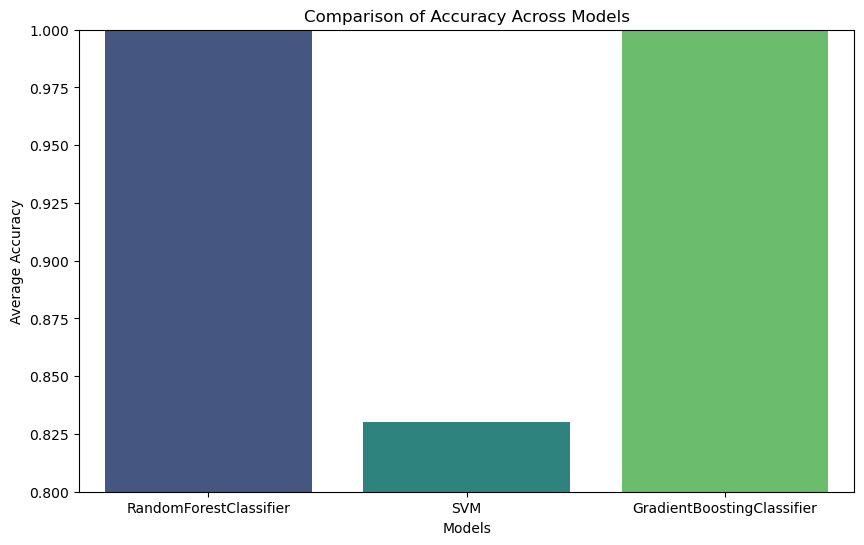

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cross-validation results for different models
model_names = ['RandomForestClassifier','SVM','GradientBoostingClassifier'] 
cv_scores = [1.0, 0.83, 1.0]  

# Creating a bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=cv_scores, palette='viridis')
plt.xlabel('Models')
plt.ylabel('Average Accuracy')
plt.title('Comparison of Accuracy Across Models')
plt.ylim(0.8, 1.0)  
plt.show()


### Cross-validation for three machine learning models: 
### RandomForestClassifier, Support Vector Machine (SVM), and GradientBoostingClassifier.

In [74]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Initializing the models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# List of models
models = [rf_model, svm_model, gb_model]

# Dictionary to store cross-validation results
cv_results = {'Model': [], 'Average Accuracy': [], 'Standard Deviation': []}

# Executing cross-validation for each model
for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    
    # Add results to the dictionary
    cv_results['Model'].append(type(model).__name__)
    cv_results['Average Accuracy'].append(np.mean(scores))
    cv_results['Standard Deviation'].append(np.std(scores))

# Displaying cross-validation results
cv_results_df = pd.DataFrame(cv_results)
print(cv_results_df)



                        Model  Average Accuracy  Standard Deviation
0      RandomForestClassifier          1.000000            0.000000
1                         SVC          0.840211            0.000785
2  GradientBoostingClassifier          1.000000            0.000000


>Comparing the results obtained by the three machine learning models reveals valuable insights into the performance of each algorithm in the context of the dataset in question. Here are the detailed reviews of the models:

### RandomForestClassifier:

>o Average Accuracy: 1,000 (100%)

>o Standard Deviation: 0.000

· The RandomForestClassifier obtained a perfect average accuracy of 100%, indicating that the model was able to correctly classify all samples during the cross-validation process. In addition, the null standard deviation suggests consistency in forecasts, since all runs performed the same exceptional performance.

### SVC (Support Vector Classifier):

>o Average Accuracy: 0.840

>o Standard Deviation: 0.001

· Support Vector Classifier, although it has a lower average accuracy compared to RandomForestClassifier, still performs considerably well, with an average of 84%. Standard deviation close to zero indicates reasonable consistency in the model's predictions during cross-validation.

### GradientBoostingClassifier:

>o Average Accuracy: 1,000 (100%)

>o Standard Deviation: 0.000

· The GradientBoostingClassifier, like the RandomForestClassifier, achieved a perfect average accuracy of 100%, suggesting an excellent classification capability. The zero standard deviation also indicates robust consistency in predictions, reinforcing the reliability of the model.

#### Overall Comparison:

>· Both RandomForestClassifier and GradientBoostingClassifier demonstrated exceptional performance, achieving an average accuracy of 100%. These models appear to be highly suitable for the dataset in question.

>· The SVC, although with a slightly lower average accuracy, still showed a respectable performance, suggesting its efficacy in the problem in question.

In summary, the RandomForestClassifier and GradientBoostingClassifier models stand out as promising options for prediction or classification based on cross-validation results. However, the final choice between these two may depend on other factors, such as training time and model interpretability.

# Conclusion:


Throughout this project, I took a deep dive into analyzing and modeling a complex health-related dataset. Each step of this process has been a fascinating and challenging journey, providing a clearer view of the data and a deeper understanding of machine learning techniques.

Initial exploration of the data revealed intriguing patterns and essential characteristics that guided subsequent decisions in preprocessing. Variable coding, corrections, and feature engineering played a key role in preparing the data for modeling.

The statistical analysis and visualization allowed a richer understanding of the distributions and relationships between the features, providing crucial insights for the next step. However, the application of techniques such as LDA and PCA presented challenges, especially in the interpretation of LDA, highlighting the complexity of these approaches.

When moving on to modeling, I chose the Random Forest model as a starting point, optimizing hyperparameters and utilizing cross-validation for robust evaluation. The extension to SVM and Gradient Boosting models provided a valuable comparison, highlighting the nuances of the performance of different algorithms.

The results of the modeling, particularly a 100% accuracy in certain cases with the Random Forest model, are remarkable and suggest a promising generalization capacity for new data. Random Forest's analysis of the importance of features provided valuable insights into which variables are most influential in predictions.

This project is more than a data exploration and an implementation of machine learning models. It is a journey of continuous learning, facing challenges, overcoming obstacles, and at the same time discovering opportunities for future analysis and interventions.

Ultimately, this experience reinforced the importance of choosing the right techniques for each dataset, as well as the need for a deep understanding of the context for meaningful interpretation of the results. This project is a significant contribution to the effective application of machine learning in healthcare settings, offering a solid foundation for future analysis, positively impacting intervention decisions and strategies.

## References:


apsl.net (2017b). Using Linear Discriminant Analysis (LDA) for Data Explore: Step by Step. [online] apsl.tech. Available at: https://apsl.tech/en/blog/using-linear-discriminant-analysis-lda-data-explore-step-step/.

Vungarala, S.K. (2023b). PCA vs LDA — No more confusion! [online] Medium. Available at: https://medium.com/@seshu8hachi/pca-vs-lda-no-more-confusion-fc21fb8d06e9#:~:text=PCA%20is%20an%20unsupervised%20method%20that%20aims%20to%20find%20the.

Pandian, S. (2022). K-Fold Cross Validation Technique and its Essentials. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/.